In [11]:
import pandas as pd 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap

In [12]:
df = pd.read_csv("/mnt/ncshare/ozkilim/BRCA/HGSOC_platinum_responce/HGSOC_TCGA_main.csv")

prots = ['RAB25', 'BCL2L1', 'HADH', 'NFKB2', 'COX7A2', 'COX7C', 'TPMT', 'GOLPH3L', 'LTA4H', 'COX6C', 'IDH1', 'YWHAG', 'S100A10', 'COX6A1', 'NDUFB3', 'TGM2', 'CDKN1B', 'NFKB1', 'CAMK2D', 'IL4I1', 'FDX1', 'VCAM1', 'ATM', 'NCAPH2', 'ABCB8', 'IDI1', 'PLIN2', 'ATP6V1D', 'GPX4', 'CA2', 'RELA', 'GLUD1', 'TOP3B', 'RPS6KB2', 'KEAP1', 'LGALS1', 'MTDH', 'AIFM1', 'RHOA', 'CASP7', 'PTGES2', 'TFRC', 'CHUK', 'GPX1', 'PDK1', 'STAT3', 'PECR', 'TALDO1', 'XIAP', 'ACADSB', 'CPOX', 'ARNT', 'BIRC2', 'ACOT7', 'HACL1', 'MYD88', 'EGFR', 'RIPK1', 'NBN', 'LDHA']

prots_df = df[prots]
prots_df.head()
labels = df['label']
sites = df['Sample Source']

/home/ozkilim/anaconda3/envs/clam/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (5283,7094) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


TCGA
Mayo
FHCRC
UAB


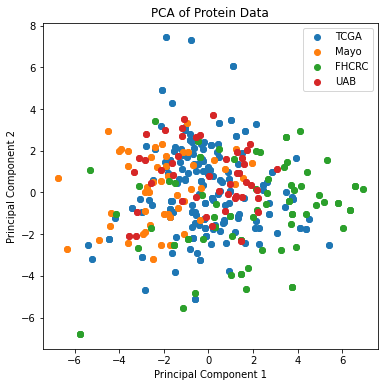

In [13]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(prots_df)

# Apply PCA
pca = PCA(n_components=2)  # for 2D visualization
principal_components = pca.fit_transform(df_scaled)

# Create a new DataFrame for the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Label'] = labels  # Add the labels to the DataFrame

df_pca['Sample Source'] = sites
# Visualize the data with colors based on labels
plt.figure(figsize=(6, 6))
for label in set(sites):
    print(label)
    idx = df_pca['Sample Source'] == label
    plt.scatter(df_pca.loc[idx, 'PC1'], df_pca.loc[idx, 'PC2'], label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Protein Data')
plt.legend()
plt.show()

In [14]:
df['label'] = df['label'].map({1:'Sensitive', 0:'Refractory'})
